# inflations impact on gas prices

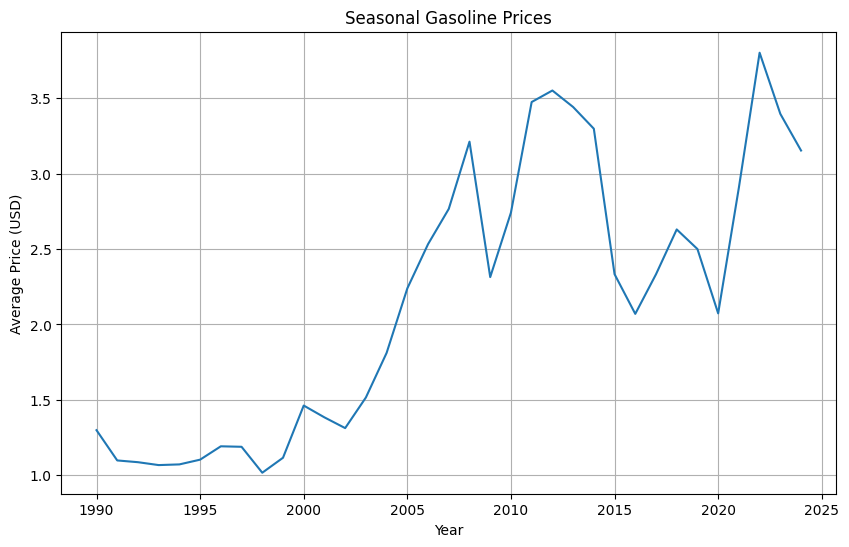

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Data/Data1_Regular_Conventional.csv", header=2)
df = df.iloc[:-1, :2]
new_headers = ['Date', 'Gas Price']  # Specify your new column names here

df.columns = new_headers

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year


average_gas_price_yearly = df.groupby('Year')['Gas Price'].mean()


plt.figure(figsize=(10, 6))
# plt.plot(seasonal_averages['Regular'], label='Regular', marker='o')
# plt.plot(seasonal_averages['Midgrade'], label='Midgrade', marker='o')
# plt.plot(seasonal_averages['Premium'], label='Premium', marker='o')

plt.title('Seasonal Gasoline Prices')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
#plt.xticks(list(seasonal_averages.index))  # Ensure all seasons are shown
#plt.legend()
plt.grid(True)

plt.plot(average_gas_price_yearly.index, average_gas_price_yearly.values)

plt.show()
